In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, category in enumerate(os.listdir(folder)):
        for filename in os.listdir(os.path.join(folder, category)):
            img = cv2.imread(os.path.join(folder, category, filename), cv2.IMREAD_GRAYSCALE) 
            if img is not None:
                img = cv2.resize(img, (56,56)) 
                img = np.expand_dims(img, axis=-1)  # Add channel dimension
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

In [3]:
cur_path = os.getcwd()
path = os.path.join(cur_path,'devnagari')

In [4]:
# Path to your dataset folder
dataset_folder = path

# Load images and labels
images, labels = load_images_from_folder(dataset_folder)

# Split data into training and testing sets
X_train, X1, y_train, y1 = train_test_split(images, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X1, y1, test_size=0.4, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0


In [5]:
# Convert integer labels to binary matrix format
y_train_binary = to_categorical(y_train)
y_test_binary = to_categorical(y_test)

# Define the CNN model
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dense(58, activation='softmax')  # Change the output layer activation according to the number of classes
# ]) gives 82% accuracy
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)),  
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu', padding='same'),  
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu', padding='same'),  
#     MaxPooling2D((2, 2)),
#     Conv2D(256, (3, 3), activation='relu', padding='same'),  
#     MaxPooling2D((2, 2)),
#     Conv2D(512, (3, 3), activation='relu', padding='same'),  
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(58, activation='softmax')
# ])

#Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(58, activation='softmax')  # Change the output layer activation according to the number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Train the model
r=model.fit(X_train, y_train_binary, epochs=30, batch_size=32, validation_data=(X_test, y_test_binary), callbacks=[early_stopping])

Epoch 1/30
283/283 [==============================] - 22s 19ms/step - loss: 3.1564 - accuracy: 0.2070 - val_loss: 1.4455 - val_accuracy: 0.6003
Epoch 2/30
283/283 [==============================] - 4s 16ms/step - loss: 1.3569 - accuracy: 0.6075 - val_loss: 0.6251 - val_accuracy: 0.8158
Epoch 3/30
283/283 [==============================] - 4s 16ms/step - loss: 0.8037 - accuracy: 0.7616 - val_loss: 0.4966 - val_accuracy: 0.8593
Epoch 4/30
283/283 [==============================] - 4s 15ms/step - loss: 0.5691 - accuracy: 0.8233 - val_loss: 0.4096 - val_accuracy: 0.8860
Epoch 5/30
283/283 [==============================] - 5s 18ms/step - loss: 0.4375 - accuracy: 0.8624 - val_loss: 0.3592 - val_accuracy: 0.8950
Epoch 6/30
283/283 [==============================] - 5s 17ms/step - loss: 0.3533 - accuracy: 0.8869 - val_loss: 0.3422 - val_accuracy: 0.8980
Epoch 7/30
283/283 [==============================] - 5s 16ms/step - loss: 0.2941 - accuracy: 0.9052 - val_loss: 0.3195 - val_accuracy: 0.901

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         1

In [7]:
y_val_binary = to_categorical(y_test)

test_loss, test_accuracy = model.evaluate(X_test, y_test_binary)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

73/73 [==============================] - 1s 9ms/step - loss: 0.3168 - accuracy: 0.9105
Test Loss: 0.31681880354881287
Test Accuracy: 0.9104991555213928


In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Use class indices directly
true_labels = y_test

# Generate classification report
report = classification_report(true_labels, predicted_labels)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print classification report
print("Classification Report:")
print(report)

# Print confusion matrix
print("\nConfusion Matrix:")
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       0.96      1.00      0.98        53
           2       0.90      0.93      0.91        56
           3       0.92      0.92      0.92        52
           4       1.00      0.98      0.99        58
           5       0.98      0.96      0.97        54
           6       0.96      1.00      0.98        53
           7       0.98      1.00      0.99        40
           8       0.98      0.96      0.97        54
           9       1.00      0.95      0.97        38
          10       0.98      0.86      0.92        51
          11       0.97      1.00      0.99        35
          12       0.93      0.89      0.91        47
          13       0.97      0.91      0.94        43
          14       0.92      0.97      0.94        34
          15       0.93      0.96      0.95        45
          16       0.94      0.94      0.94        36
    

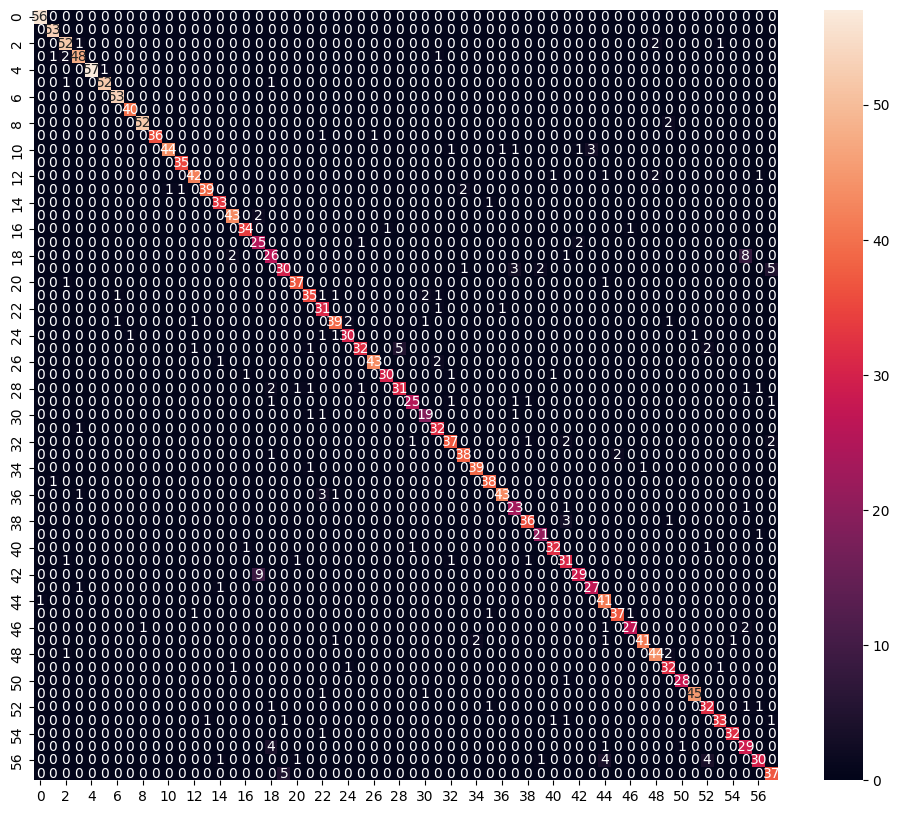

In [9]:
import seaborn as sns
# Create a subplot with a larger size
fig, ax = plt.subplots(figsize=(12, 10))

# Create the heatmap
sns.heatmap(cm, annot=True, ax=ax)

# Show the plot
plt.show()

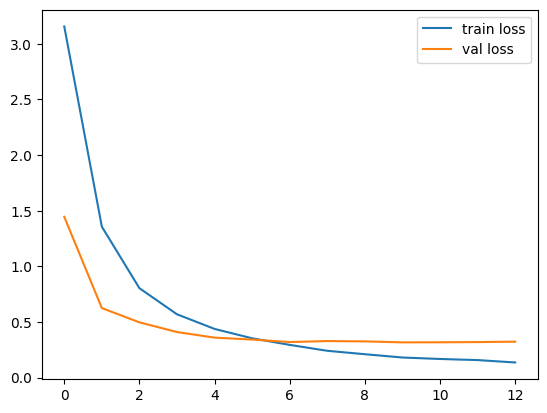

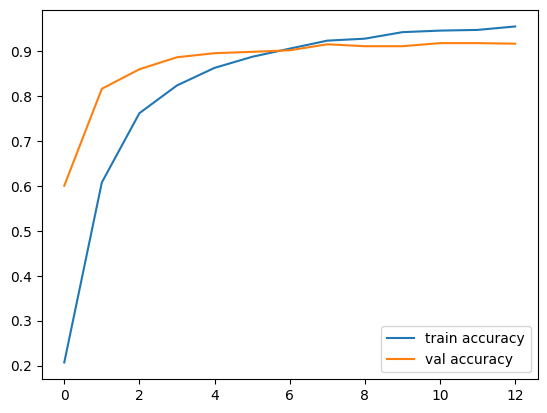

In [10]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

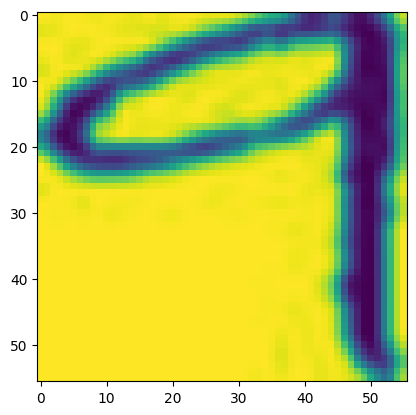

In [11]:
plt.imshow(X_test[7])

In [12]:
print(np.argmax(predictions[7]))

1


In [13]:
# Define the file path to save the model
model_path = os.path.join(cur_path, r'model2.h5')

# Save the model
model.save(model_path)

print("Model saved successfully.")

Model saved successfully.


In [14]:
model.save("my_model2.h5")

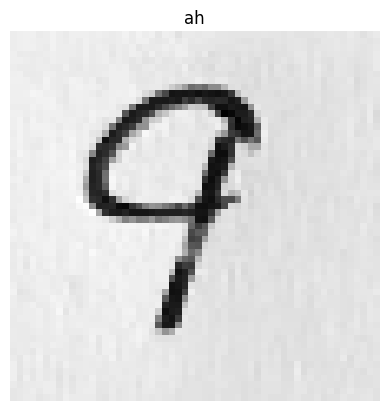

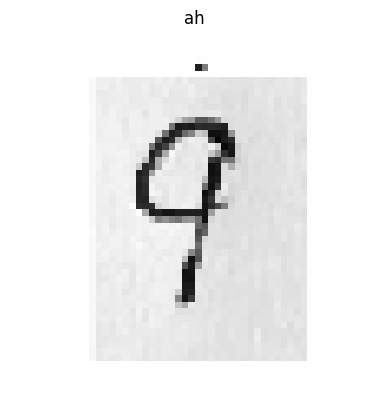

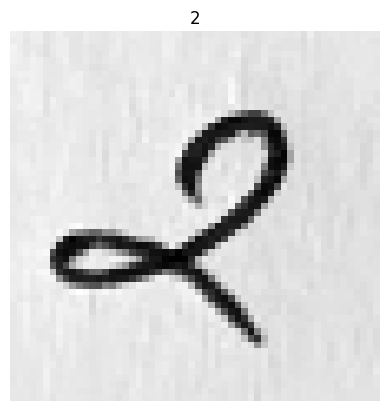

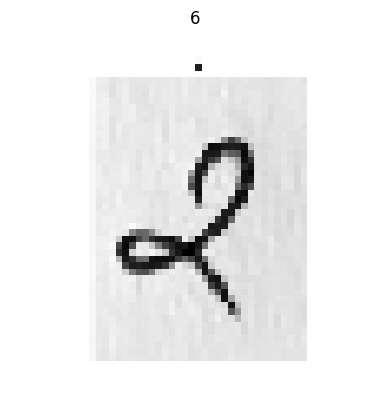

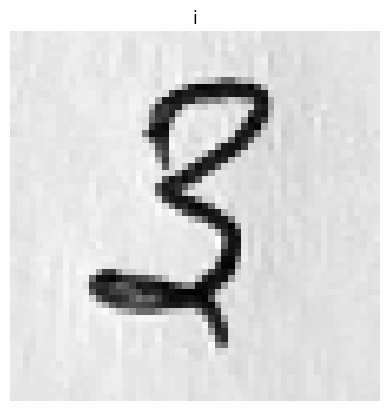

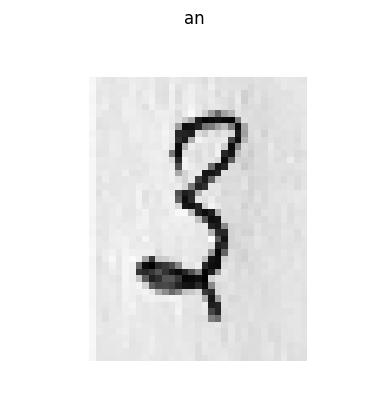

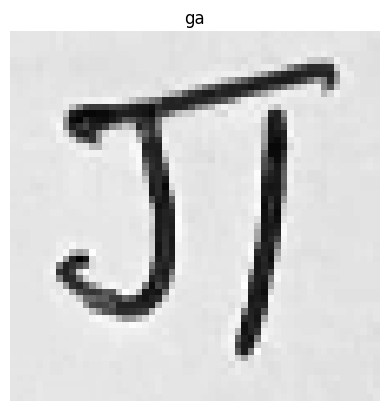

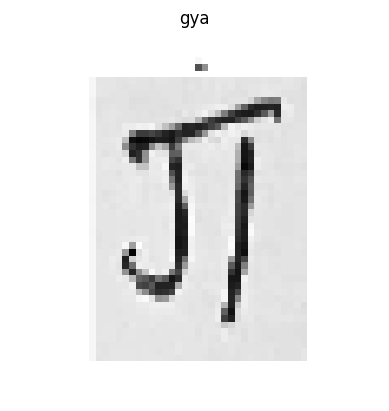

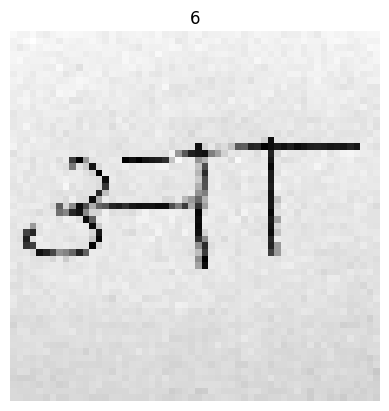

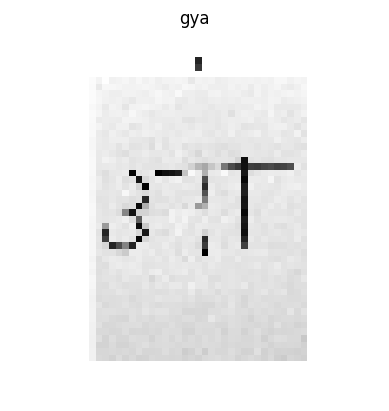

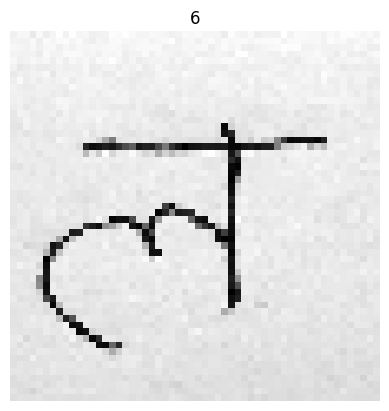

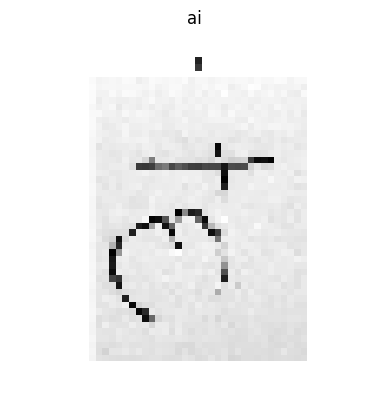

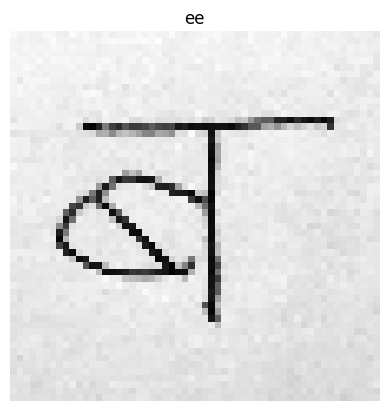

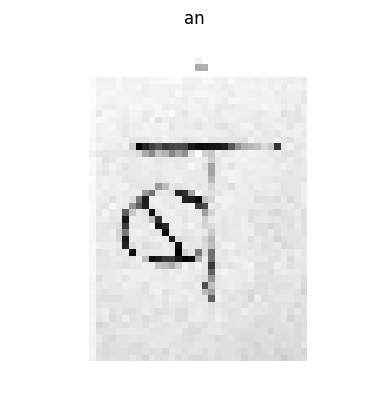

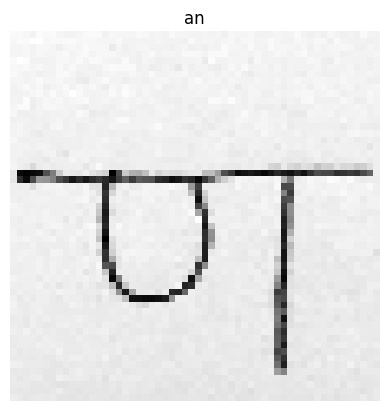

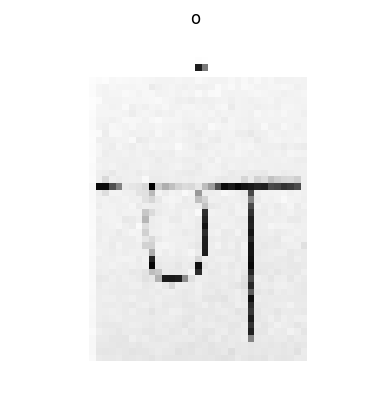

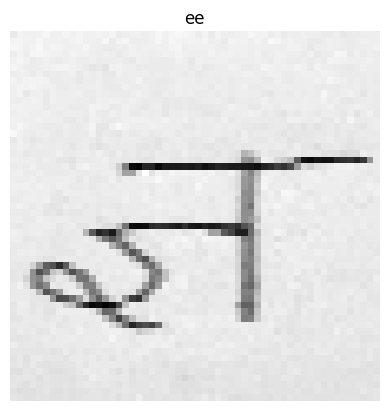

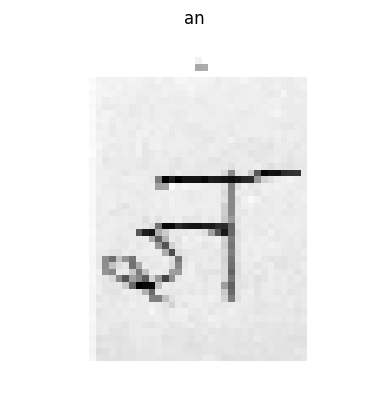

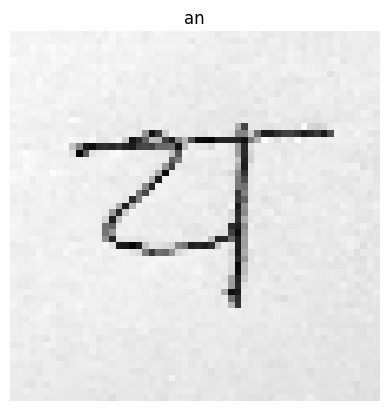

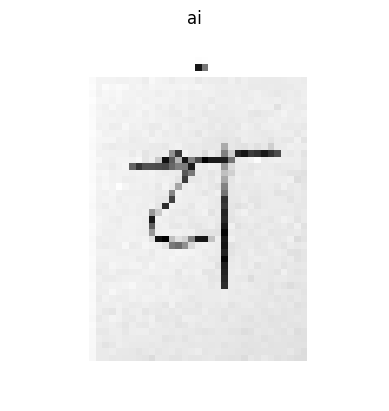

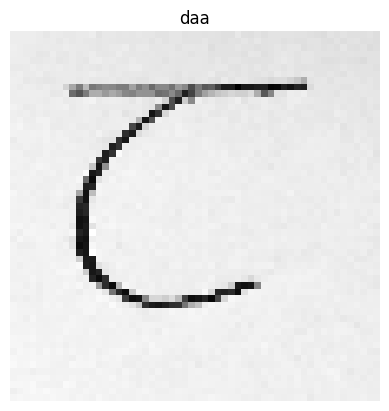

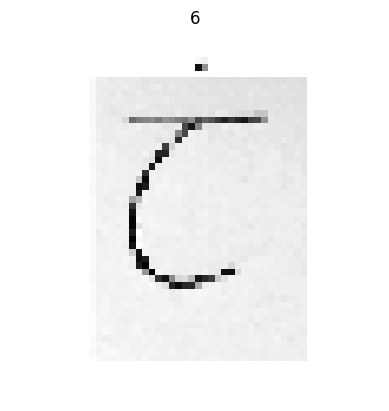

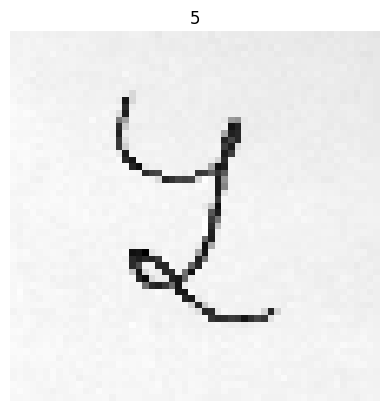

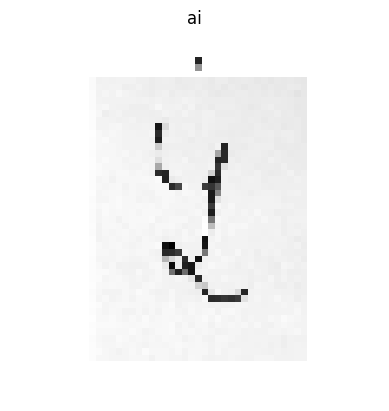

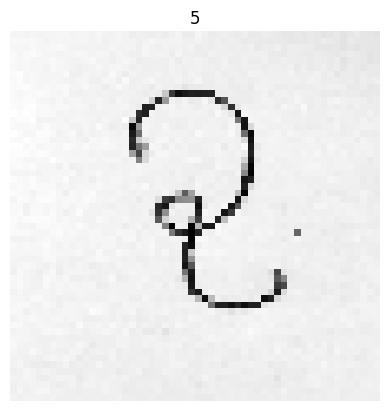

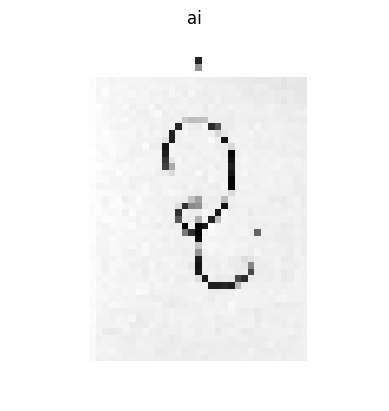

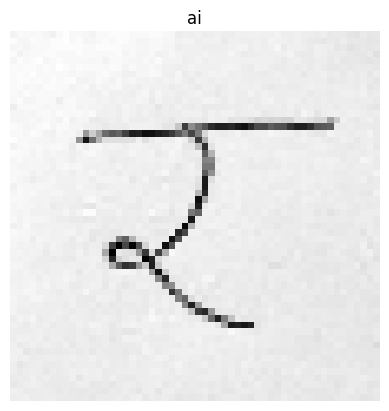

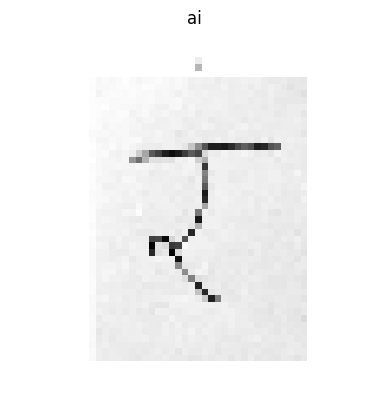

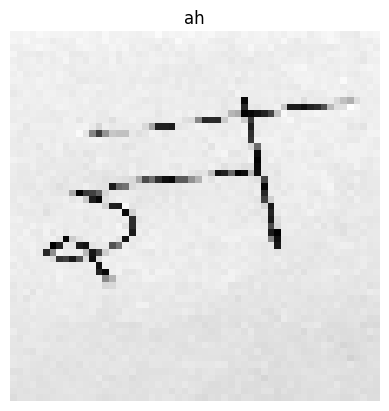

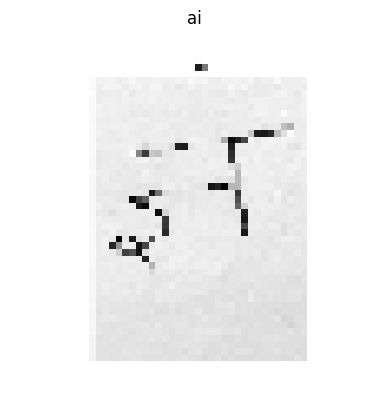

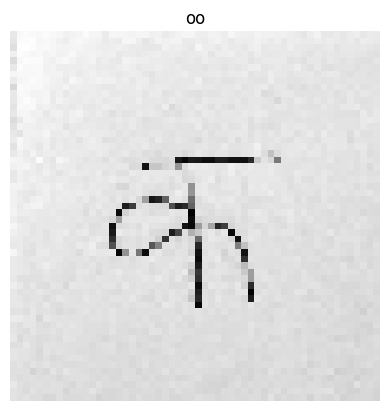

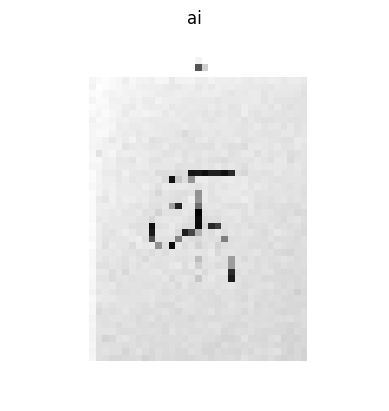

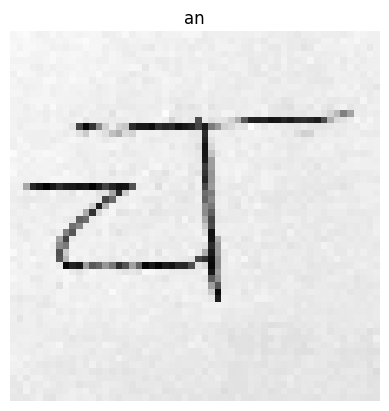

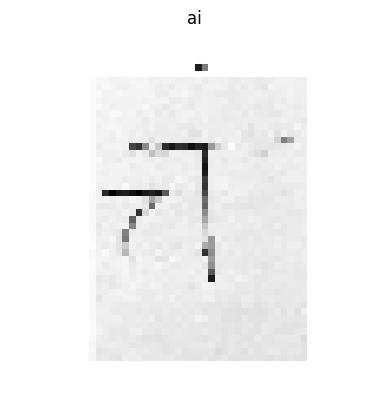

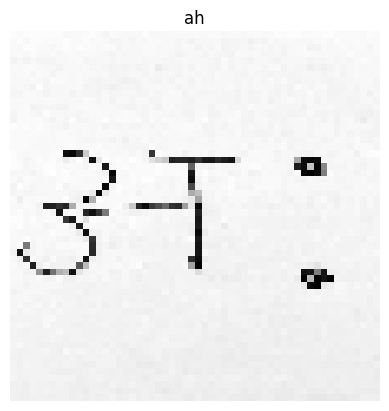

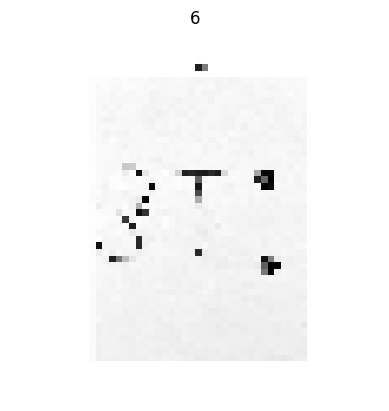

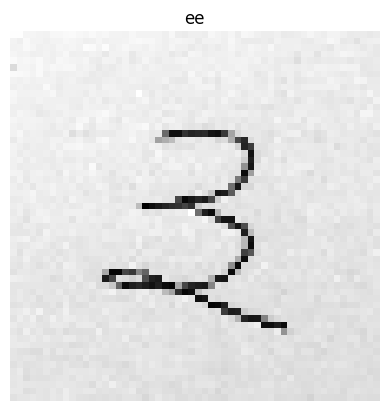

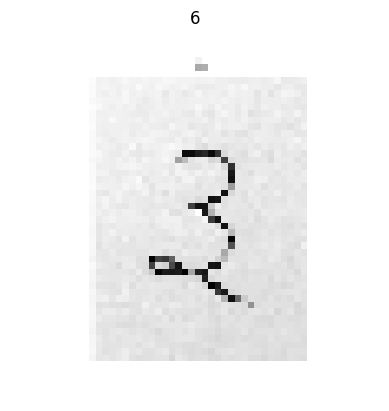

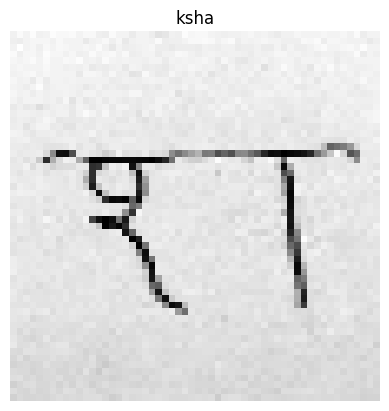

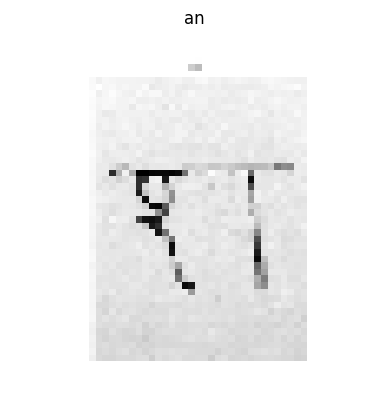

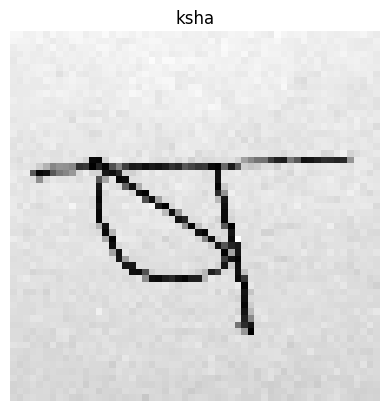

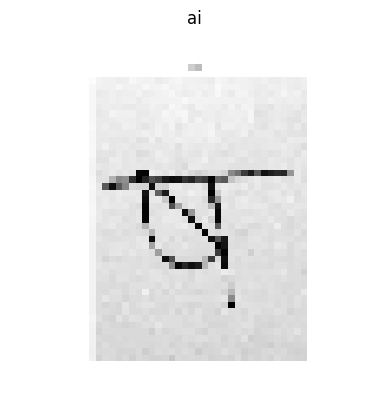

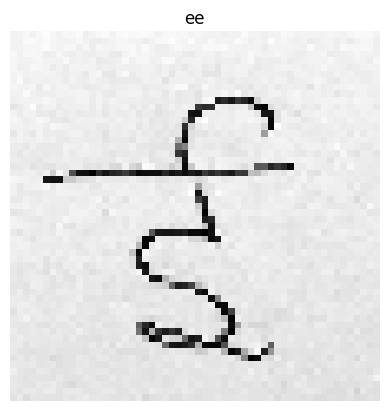

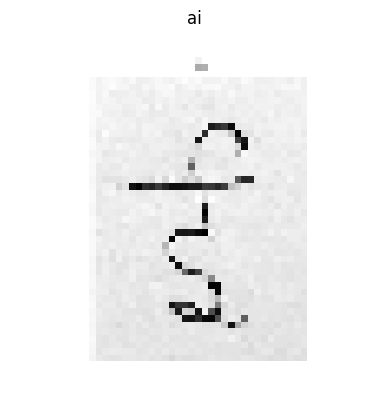

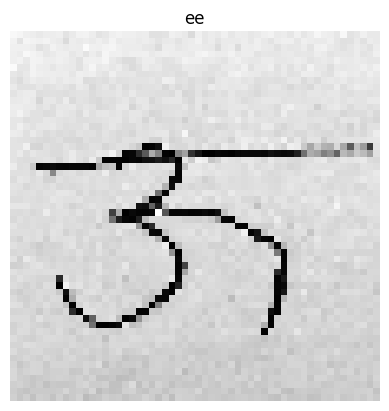

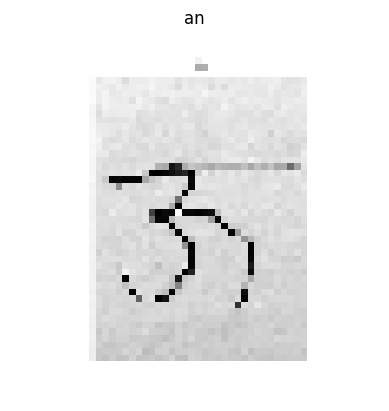

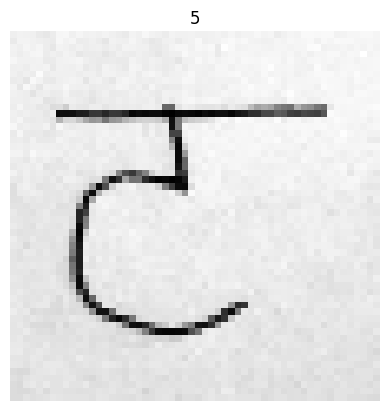

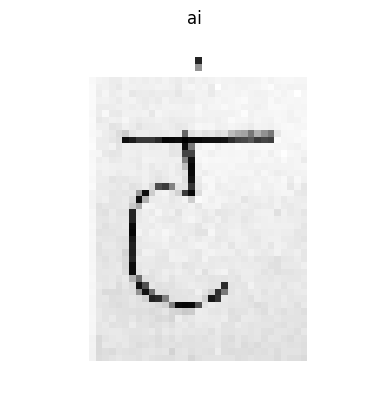

In [16]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Define the labels
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'aa', 'ae', 'ah', 'ai', 'an', 'ana', 'au', 'ba', 'bha',
        'cha', 'chha', 'da', 'daa', 'dha', 'dhaa', 'ee', 'ga', 'gha', 'gya', 'ha', 'i', 'ja', 'jha', 'ka', 'kha', 'kna',
        'ksha', 'la', 'ma', 'motosaw', 'na', 'o', 'oo', 'pa', 'patalosaw', 'petchiryosaw', 'pha', 'ra', 'ta', 'taa', 'tha',
        'thaa', 'tra', 'u', 'va', 'ya', 'yna']

# Path to the folder containing images
folder_path = 'uploaded_files'

# Get list of all image files in the folder
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Load the trained model
trained_model = load_model('my_model2.h5')

# Iterate over each image file
for image_path in image_files:
    # Load the image
    img = cv2.imread(image_path)
    
    # Convert color image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Resize the grayscale image
    img_resized = cv2.resize(img_gray, (56, 56))
    
    # Expand dimensions to match model input shape
    img_array = np.expand_dims(img_resized, axis=-1)  # Add channel dimension
    
    img_array = img_array.astype('float32') / 255.0  # Rescale pixel values to [0, 1]

    # Make predictions
    predictions = trained_model.predict(np.array([img_array]))
    predicted_label = np.argmax(predictions[0])

    # Display the image
    plt.imshow(img_resized, cmap='gray')
    plt.axis('off')

    # Display the predicted class label
    plt.title(labels[predicted_label])
    output_file_path = os.path.splitext(image_path)[0] + '_predicted.png'
    plt.savefig(output_file_path)
    
    plt.show()


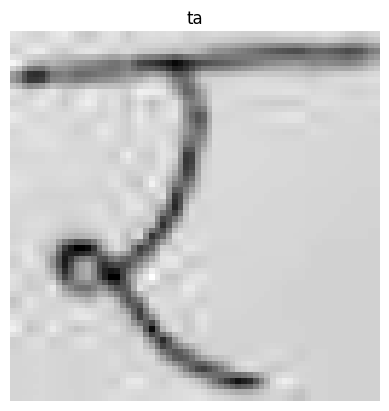

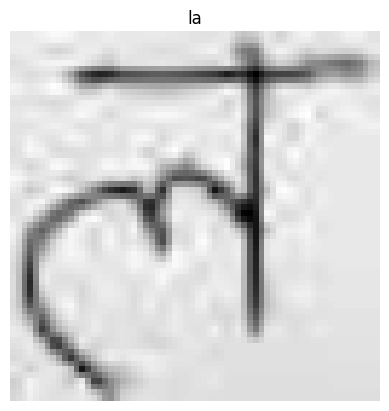

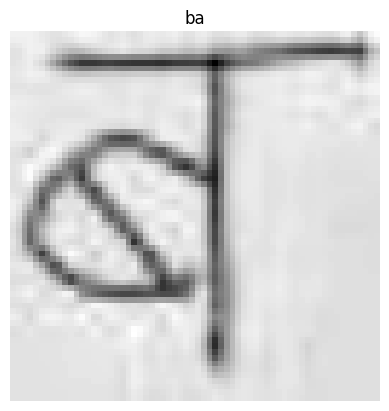

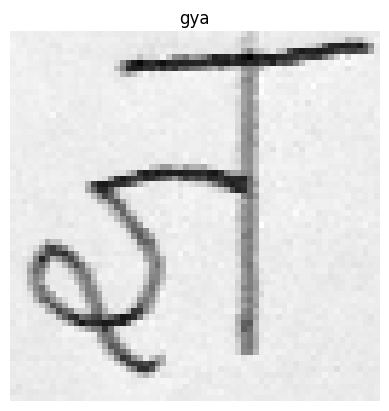

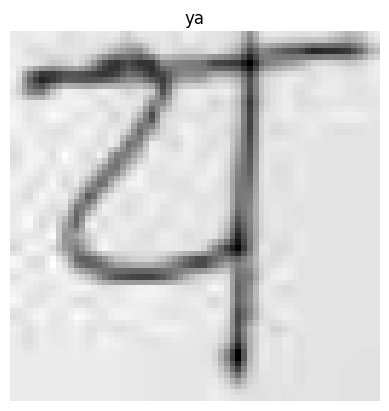

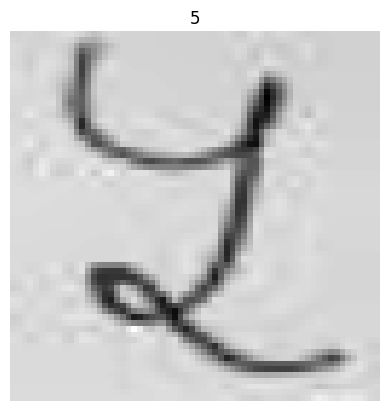

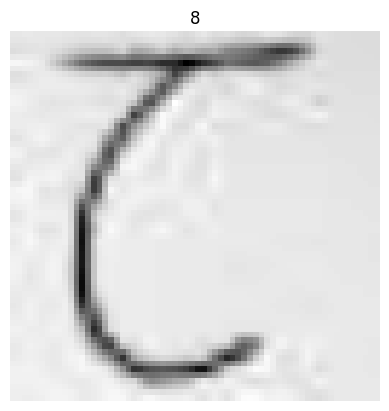

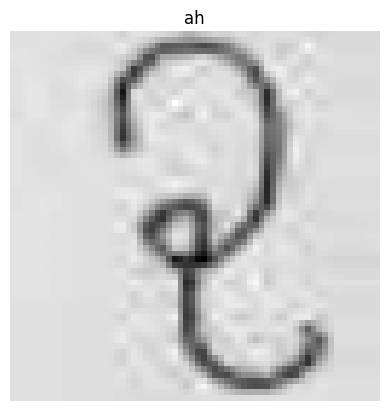

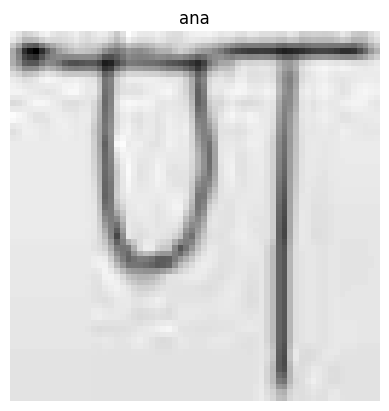

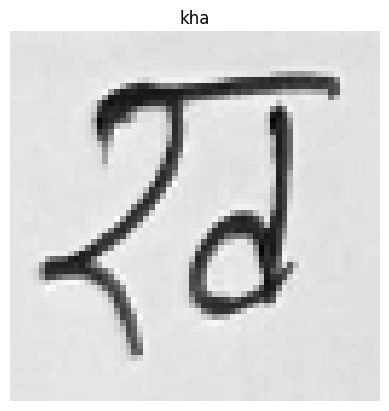

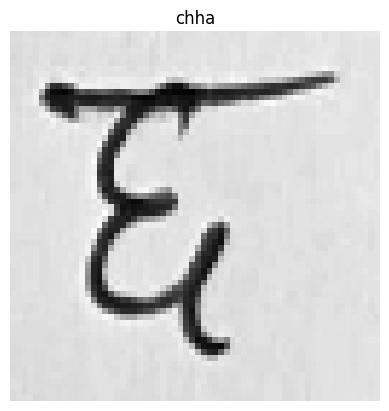

In [18]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Define the labels
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'aa', 'ae', 'ah', 'ai', 'an', 'ana', 'au', 'ba', 'bha',
        'cha', 'chha', 'da', 'daa', 'dha', 'dhaa', 'ee', 'ga', 'gha', 'gya', 'ha', 'i', 'ja', 'jha', 'ka', 'kha', 'kna',
        'ksha', 'la', 'ma', 'motosaw', 'na', 'o', 'oo', 'pa', 'patalosaw', 'petchiryosaw', 'pha', 'ra', 'ta', 'taa', 'tha',
        'thaa', 'tra', 'u', 'va', 'ya', 'yna']

# Path to the folder containing images
folder_path = 'New folder'

# Get list of all image files in the folder
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Load the trained model
trained_model = load_model('my_model.h5')

# Iterate over each image file
for image_path in image_files:
    # Load the image
    img = cv2.imread(image_path)
    
    # Convert color image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Resize the grayscale image
    img_resized = cv2.resize(img_gray, (64, 64))
    
    # Expand dimensions to match model input shape
    img_array = np.expand_dims(img_resized, axis=-1)  # Add channel dimension
    
    img_array = img_array.astype('float32') / 255.0  # Rescale pixel values to [0, 1]

    # Make predictions
    predictions = trained_model.predict(np.array([img_array]))
    predicted_label = np.argmax(predictions[0])

    # Display the image
    plt.imshow(img_resized, cmap='gray')
    plt.axis('off')

    # Display the predicted class label
    plt.title(labels[predicted_label])
    output_file_path = os.path.splitext(image_path)[0] + '_predicted.png'
    plt.savefig(output_file_path)
    
    plt.show()
